![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Morphological Operations in Image Porcessing

From [Tutorial OpenCV](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

This code is based on opencv, also these morphological operations can be found in the library [scikit-image](https://scikit-image.org/docs/dev/api/skimage.morphology.html).

# Morphological Operations in Binary Images

In [ ]:
!wget https://www.dropbox.com/s/fok3q35hm1o2k13/jota.png

--2023-07-17 20:02:48--  https://www.dropbox.com/s/fok3q35hm1o2k13/jota.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fok3q35hm1o2k13/jota.png [following]
--2023-07-17 20:02:48--  https://www.dropbox.com/s/raw/fok3q35hm1o2k13/jota.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc158de99fb2c87b47b83fc3928d.dl.dropboxusercontent.com/cd/0/inline/CAAmgGcty2IjwuEGIgfa4guRP5i18iaLRWXJevy8Lc-be-ppNQVGb1Gjjfy6mddmwevI7LJu_1NDiwfrrucIj9cnrHDYVe2ZxM_hTEJrm9Xsk7ghVcCeETy0sGzFwyhVd8RV_S8SLbzCadpGwIbE0F11sYY7-8wTjFcIrNdZ67go0Q/file# [following]
--2023-07-17 20:02:49--  https://uc158de99fb2c87b47b83fc3928d.dl.dropboxusercontent.com/cd/0/inline/CAAmgGcty2IjwuEGIgfa4guRP5i18iaLRWXJevy8Lc-be-ppNQVGb1Gjjfy6mddmwevI7LJu_1NDiwfrrucIj9cnrHDY

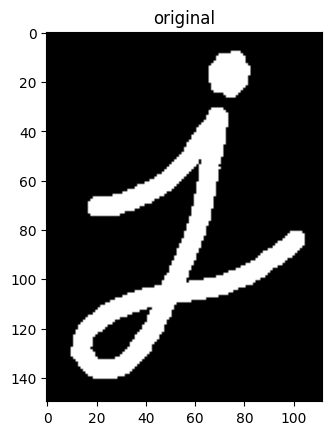

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('jota.png',0)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.show()


# Erosion

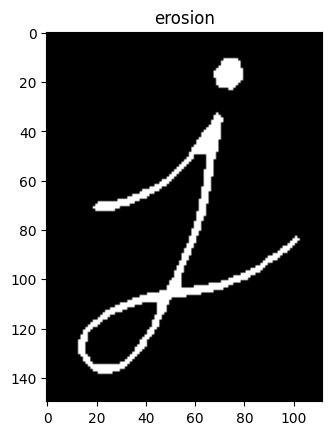

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion,cmap='gray')
plt.title('erosion')
plt.show()


# Dilation

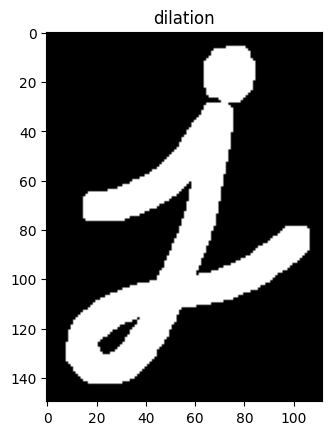

In [ ]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation,cmap='gray')
plt.title('dilation')
plt.show()


# Opening

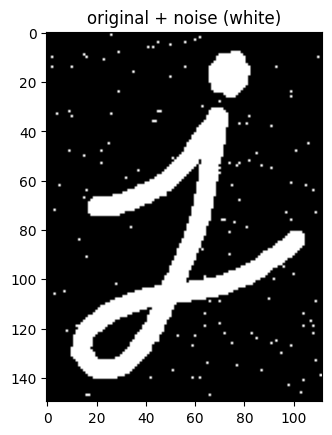

In [ ]:
(N,M) = img.shape

img_noise = img.copy()

for i in range(N):
  for j in range(M):
    if np.random.rand()>0.99:
      img_noise[i,j] = 255

plt.imshow(img_noise,cmap='gray')
plt.title('original + noise (white)')
plt.show()

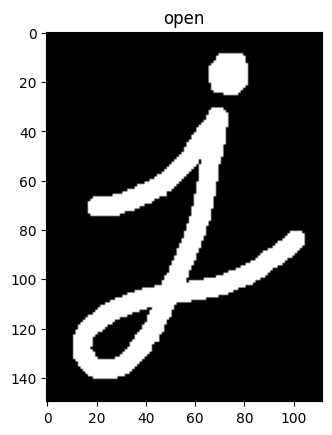

In [ ]:
opening = cv2.morphologyEx(img_noise, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')
plt.title('open')
plt.show()

# Closing

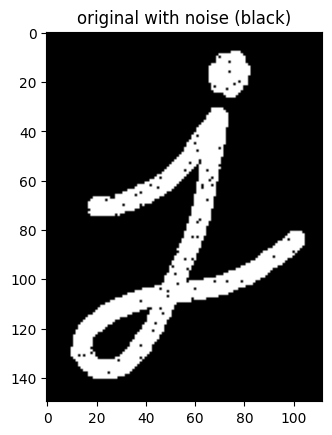

In [ ]:
(N,M) = img.shape

img_noise = img.copy()

for i in range(N):
  for j in range(M):
    if np.random.rand()>0.97:
      img_noise[i,j] = 0

plt.imshow(img_noise,cmap='gray')
plt.title('original with noise (black)')
plt.show()

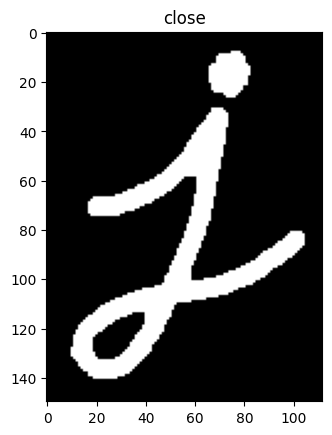

In [ ]:
closing = cv2.morphologyEx(img_noise, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')
plt.title('close')
plt.show()

# Fill holes

In [ ]:
def fillhole(input_image):
    '''
    input gray binary image  get the filled image by floodfill method
    Note: only holes surrounded in the connected regions will be filled.
    :param input_image:
    :return:
    from https://www.programcreek.com/python/example/89425/cv2.floodFill
    '''
    im_flood_fill = input_image.copy()
    h, w = input_image.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)
    im_flood_fill = im_flood_fill.astype("uint8")
    cv2.floodFill(im_flood_fill, mask, (0, 0), 255)
    im_flood_fill_inv = cv2.bitwise_not(im_flood_fill)
    img_out = input_image | im_flood_fill_inv
    return img_out

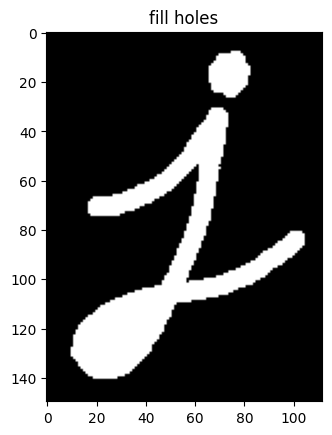

In [ ]:
im_fill = fillhole(img)

plt.imshow(im_fill,cmap='gray')
plt.title('fill holes')
plt.show()


# Skeletization

By [N. Reddy](https://medium.com/analytics-vidhya/skeletonization-in-python-using-opencv-b7fa16867331)

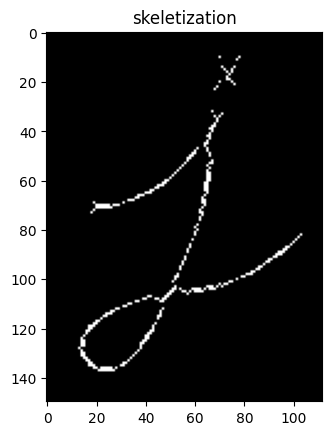

In [ ]:

# Step 1: Create an empty skeleton
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img)==0:
        break

plt.imshow(skel,cmap='gray')
plt.title('skeletization')
plt.show()


# Morphological Gradient

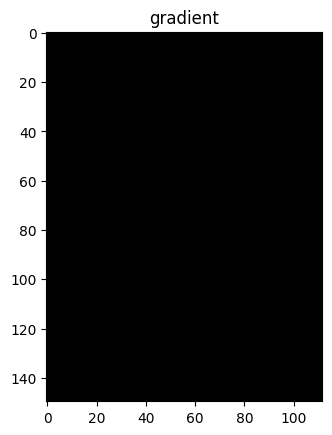

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient,cmap='gray')
plt.title('gradient')
plt.show()

# Morphological Operations in Grayscale Images


In [ ]:
!wget https://www.dropbox.com/s/ccebfv6fhlk6h4q/tazmania.png

--2023-07-17 20:02:53--  https://www.dropbox.com/s/ccebfv6fhlk6h4q/tazmania.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ccebfv6fhlk6h4q/tazmania.png [following]
--2023-07-17 20:02:53--  https://www.dropbox.com/s/raw/ccebfv6fhlk6h4q/tazmania.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4eb31525dca014c575fb946b0c.dl.dropboxusercontent.com/cd/0/inline/CAD_WS12PLVVyUCBzJrqKfju8_m2pGAM8kjHmoenHPcGdB8yjbrenvIPVSQpBQAtlfRWy9ZNTefpUyhvqt08bF8MiXJqeHYTX8eGft1GNg9jJ-NjSMrFU3WuneDxvnkQjuL7tjlhthGDtayVCy9yLoCTZY4zB3_7gyyNIDwG0clnRQ/file# [following]
--2023-07-17 20:02:54--  https://uc4eb31525dca014c575fb946b0c.dl.dropboxusercontent.com/cd/0/inline/CAD_WS12PLVVyUCBzJrqKfju8_m2pGAM8kjHmoenHPcGdB8yjbrenvIPVSQpBQAtlfRWy9ZNTefpUyhv

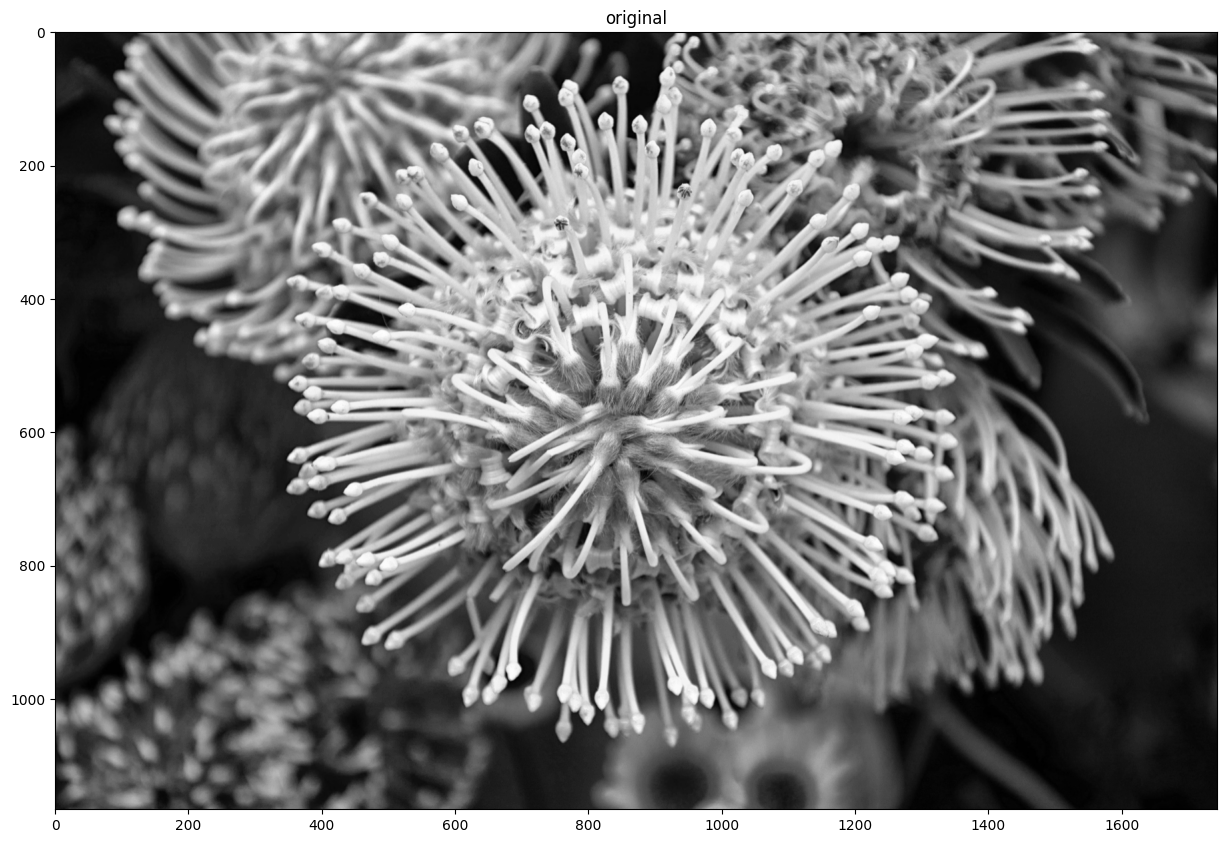

In [ ]:
img = cv2.imread('tazmania.png',0)
plt.figure(figsize=(15,18))
plt.imshow(img,cmap='gray')
plt.title('original')
plt.show()


In [ ]:
n = 7
kernel = np.ones((n,n),np.uint8)

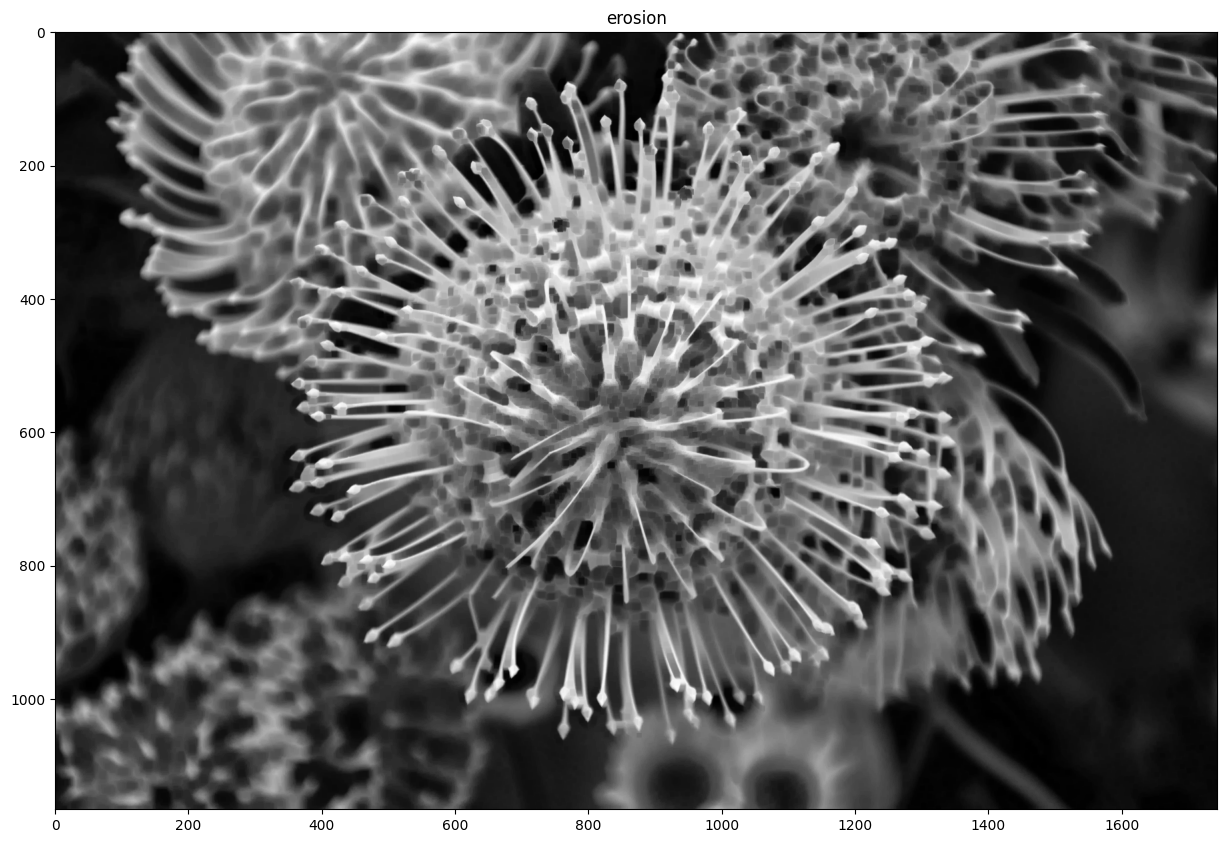

In [ ]:
erosion = cv2.erode(img,kernel,iterations = 1)
plt.figure(figsize=(15,18))
plt.imshow(erosion,cmap='gray')
plt.title('erosion')
plt.show()


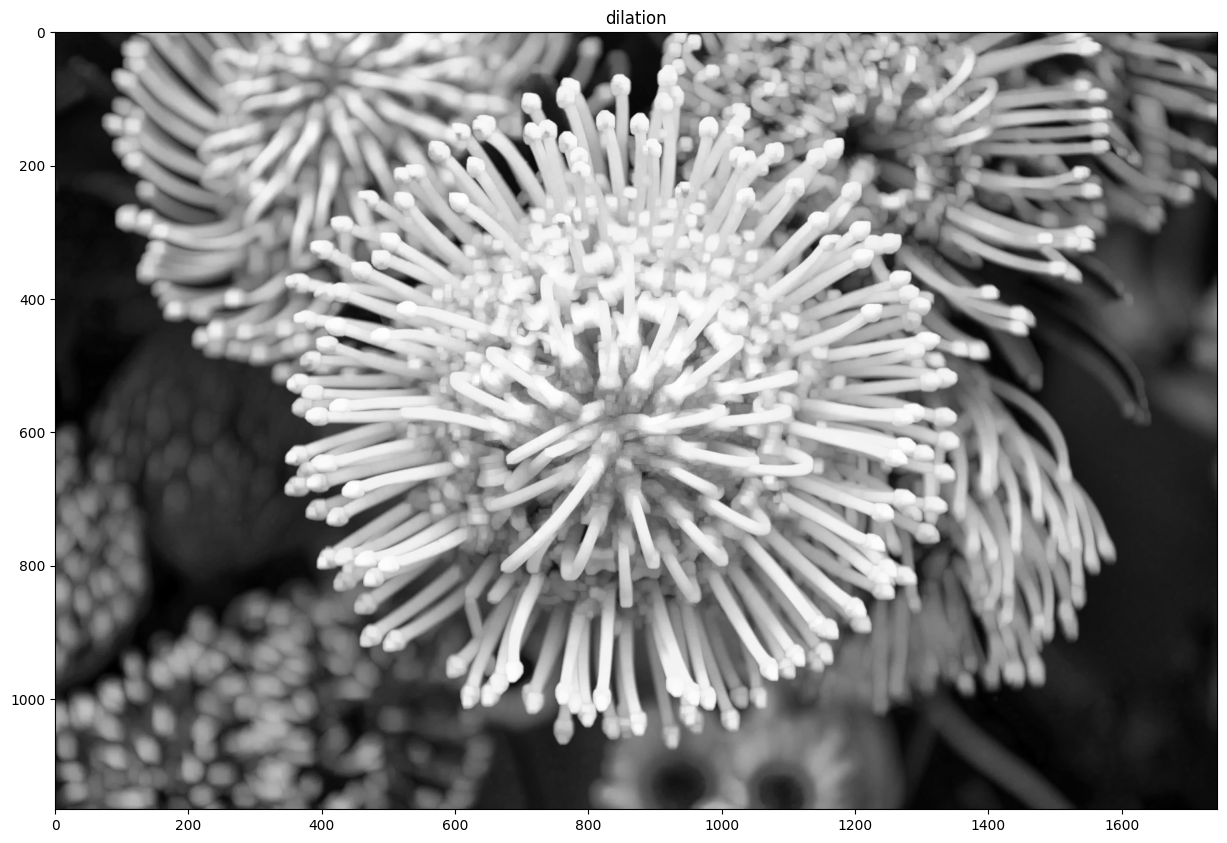

In [ ]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(15,18))
plt.imshow(dilation,cmap='gray')
plt.title('dilation')
plt.show()


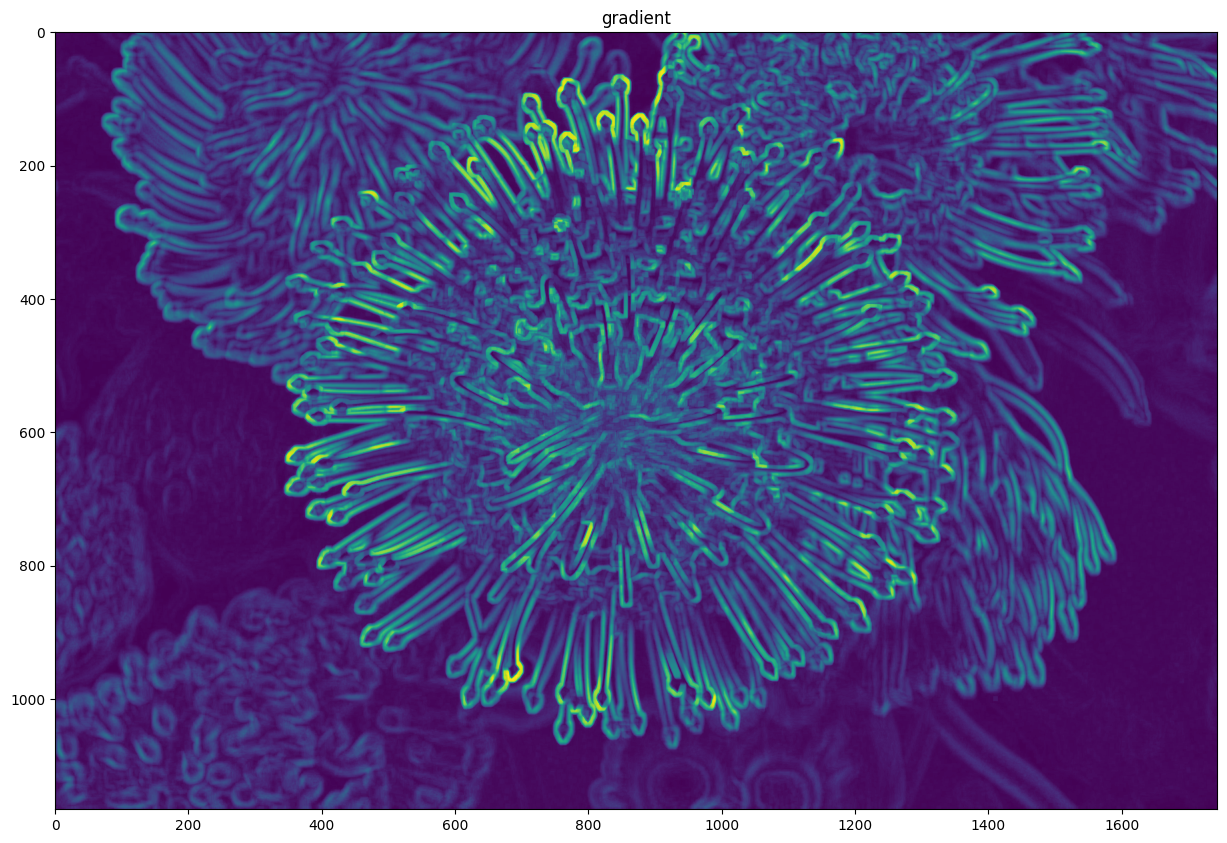

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(15,18))
#plt.imshow(gradient,cmap='gray')
plt.imshow(gradient) #color rerpesentation
plt.title('gradient')
plt.show()